## Titanic Disaster

###  1. Problem definition
        Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
        We're going to use classification model. We have two posibilities Survival (1) and not (0).
    

###  2. Data
        We have train and test data. Into train data we're going to make validation data (0.2) to check our results before we compare our prediction with test data. 
        
###  3. Evaluation
    Our score is the percentage of passengers you correctly predict. This is known as accuracy.
    survival	Survival	0 = No, 1 = Yes - target
    We're going to submit csv file with exactly 418 entries plus a header row. 
    The file should have exactly 2 columns:

    PassengerId (sorted in any order)
    Survived (contains your binary predictions: 1 for survived, 0 for deceased)

### 4. Features
    
    ** pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    ** sex	Sex	
    ** Age	Age in years	
    ** sibsp	# of siblings / spouses aboard the Titanic	
    ** parch	# of parents / children aboard the Titanic	
    ** ticket	Ticket number	
    ** fare	Passenger fare	
    ** cabin	Cabin number	
    ** embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
    
    Explanation of features:
    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

### 5. Modeling
    We're going to use classification model, idk yet which one, but I will check.

### 6. Experimenting
    We have to get the best accuracy then we will work on that

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_csv = pd.read_csv("train.csv")

In [3]:
data_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_csv['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
data_csv.shape

(891, 12)

In [6]:
data_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data_csv.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data_csv.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
data_csv['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
data_csv['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [12]:
min(data_csv.Age), max(data_csv.Age)

(0.42, 80.0)

### Check correlation between 'Sex' and Survived' 

In [13]:
pd.crosstab(data_csv['Sex'], data_csv['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


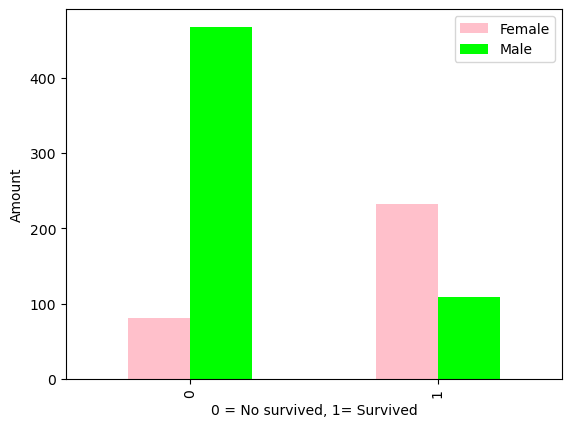

In [20]:
pd.crosstab(data_csv['Survived'], data_csv['Sex']).plot(kind="bar", color=["pink", "lime"])
plt.xlabel("0 = No survived, 1= Survived")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);

### Check correlation between 'Pclass' and 'Survived'

In [27]:
pd.crosstab(data_csv['Pclass'], data_csv['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


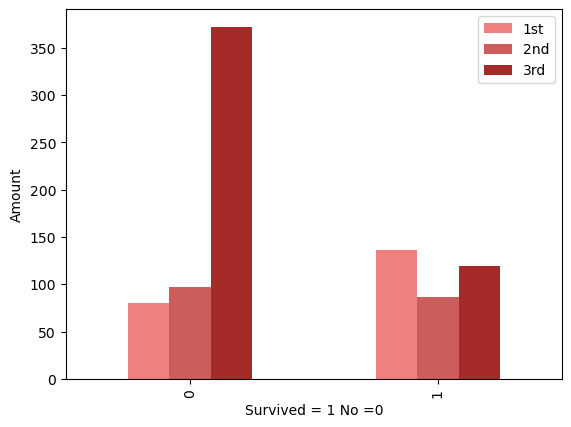

In [26]:
pd.crosstab(data_csv['Survived'], data_csv['Pclass']).plot(kind='bar', color=['lightcoral', 'indianred', 'brown']);
plt.ylabel("Amount")
plt.xlabel("Survived = 1 No =0")
plt.legend(["1st","2nd","3rd"]);

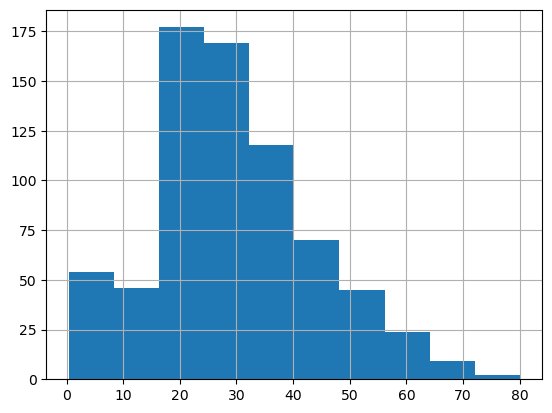

In [34]:
data_csv['Age'].hist();

## Fill missing data

In [35]:
data_csv['Age'].median()

28.0

In [36]:
data_csv['Age'].fillna(data_csv['Age'].median(), inplace=True)

In [37]:
data_csv['Cabin'].isna().sum()

687

In [38]:
data_csv = data_csv.drop(columns='Cabin')


In [39]:
data_csv.shape

(891, 11)

In [40]:
data_csv['Embarked'].isna().sum()

2

In [41]:
data_csv['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
data_csv['Embarked'] = data_csv['Embarked'].fillna("S")

In [43]:
data_csv['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
data_csv.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Turn into numbers

In [45]:
for label, content in data_csv.items():
    if pd.api.types.is_object_dtype(content):
        data_csv[label] = content.astype("category").cat.as_ordered()


In [46]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 115.1 KB


In [66]:
data_csv['Name'] = data_csv['Name'].cat.codes
data_csv['Sex'] = data_csv['Sex'].cat.codes
data_csv['Ticket'] = data_csv['Ticket'].cat.codes
#data_csv['Embarked'] = data_csv['Embarked'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [67]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int8   
dtypes: float64(2), int16(2), int64(5), int8(2)
memory usage: 54.1 KB


In [68]:
test_csv = pd.read_csv("test.csv")

In [69]:
test_csv.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [70]:
test_csv = test_csv.drop(columns='Cabin')


In [71]:
test_csv['Fare'] = test_csv['Fare'].fillna(test_csv['Fare'].mean())

In [106]:
test_csv['Age'].fillna(test_csv['Age'].mean(), inplace=True)

In [107]:
test_csv.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [108]:
for label, content in test_csv.items():
    if pd.api.types.is_object_dtype(content):
        test_csv[label] = content.astype("category").cat.as_ordered()

In [109]:
test_csv['Name'] = test_csv['Name'].cat.codes
test_csv['Sex'] = test_csv['Sex'].cat.codes
test_csv['Ticket'] = test_csv['Ticket'].cat.codes
test_csv['Embarked'] = test_csv['Embarked'].cat.codes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
np.random.seed(42)
X = data_csv.drop('Survived', axis = 1)
y = data_csv['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
clf = RandomForestClassifier(n_estimators=500)

In [111]:
clf.fit(X_train, y_train)
clf.score(X_val, y_val)

0.8324022346368715

In [112]:
np.random.seed(42)
clf2 = ExtraTreesClassifier(n_estimators=2000)
clf2.fit(X_train, y_train)
clf2.score(X_val, y_val)

0.8324022346368715

In [113]:
y_test = clf2.predict(test_csv)

In [114]:
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [120]:
submission_data = pd.DataFrame(columns=['PassengerId','Survived'])

In [121]:
submission_data['PassengerId'] = test_csv['PassengerId']

In [122]:
submission_data['Survived'] = y_test

In [123]:
submission_data['Survived'].value_counts()

0    251
1    167
Name: Survived, dtype: int64

In [124]:
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
submission_data.to_csv("submission_results.csv", index=False)